In [ ]:
#pip install matplotlib SchemDraw

In [1]:
import schemdraw as schemdraw
import schemdraw.elements as elm

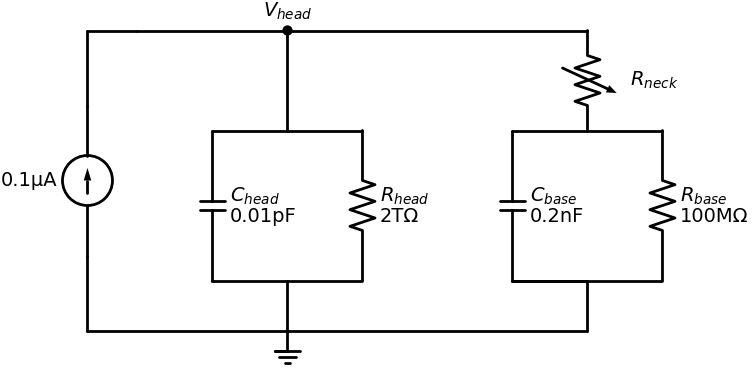

In [2]:
with schemdraw.Drawing() as d:
    elm.SourceI().label('0.1μA')
    elm.Line().up(1.5)
    elm.Line().right(1)
    Vh = elm.Line().right()
    d.push()
    elm.Line().down(2)
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{head}$\n0.01pF', loc='bottom')
    elm.Line().right()
    elm.Resistor().up().label('$R_{head}$\n2TΩ', loc='bottom')
    elm.Line().left(1.5)
    d.pop()
    elm.Dot().label('$V_{head}$')
    elm.Line().right(6)
    elm.ResistorVar().down(2).label('$R_{neck}$', loc='bottom') #\n10MΩ
    #
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{base}$\n0.2nF', loc='bottom')
    d.push()
    elm.Line().right(3)
    elm.Resistor().up().label('$R_{base}$\n100MΩ', loc='bottom')
    elm.Line().left(1.5)
    #
    d.pop()
    elm.Line().right(1.5)
    elm.Line().down(1)
    elm.Line().left(6)
    d.push()
    elm.Ground()
    elm.Line().left(4)
    elm.Line().up(1.5)
    d.pop()
    elm.Line().up(1)

#d.save('circuit_diagram3.pdf')

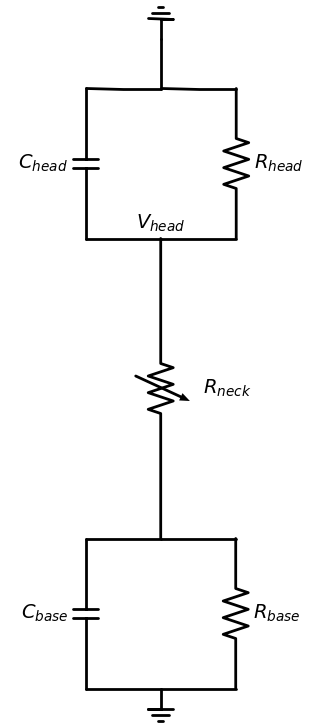

In [3]:
## Draw it as a spine
with schemdraw.Drawing() as d:
    elm.Ground().theta(180)
    elm.Line().down(1)
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{head}$', loc='top') # \n0.01pF
    elm.Line().right(1.5)
    d.push()
    elm.Line().right(0.01).label('$V_{head}$', loc='top')
    elm.Line().right(1.5)
    #elm.Label('Label', loc='center', align='top', at=(ll1.end + ll2.start) / 2)
    #
    elm.Resistor().up().label('$R_{head}$', loc='bottom') # \n2TΩ
    elm.Line().left(1.5)
    d.pop()
    #elm.Dot().label('$V_{head}$')
    #elm.Line().right(6)
    elm.ResistorVar().down(6).label('$R_{neck}$', loc='bottom') #\n10MΩ
    #
    #
    elm.Line().left().length(1.5)
    elm.Capacitor().down().label('$C_{base}$', loc='top') # \n0.2nF
    d.push()
    elm.Line().right(1.5)
    d.push()
    elm.Line().right(1.5)
    elm.Resistor().up().label('$R_{base}$', loc='bottom') # \n100MΩ
    elm.Line().left(1.5)
    #
    d.pop()
    elm.Ground()
    
#d.save('circuit_spine3.pdf')

In [39]:
np.logspace(0, 10, 1000)

array([1.00000000e+00, 1.02331658e+00, 1.04717682e+00, 1.07159340e+00,
       1.09657929e+00, 1.12214777e+00, 1.14831241e+00, 1.17508713e+00,
       1.20248614e+00, 1.23052400e+00, 1.25921561e+00, 1.28857621e+00,
       1.31862140e+00, 1.34936714e+00, 1.38082977e+00, 1.41302599e+00,
       1.44597292e+00, 1.47968806e+00, 1.51418933e+00, 1.54949504e+00,
       1.58562396e+00, 1.62259529e+00, 1.66042866e+00, 1.69914417e+00,
       1.73876240e+00, 1.77930439e+00, 1.82079168e+00, 1.86324631e+00,
       1.90669084e+00, 1.95114835e+00, 1.99664245e+00, 2.04319732e+00,
       2.09083769e+00, 2.13958887e+00, 2.18947676e+00, 2.24052787e+00,
       2.29276931e+00, 2.34622885e+00, 2.40093488e+00, 2.45691646e+00,
       2.51420335e+00, 2.57282597e+00, 2.63281547e+00, 2.69420371e+00,
       2.75702333e+00, 2.82130768e+00, 2.88709092e+00, 2.95440800e+00,
       3.02329468e+00, 3.09378757e+00, 3.16592411e+00, 3.23974263e+00,
       3.31528234e+00, 3.39258338e+00, 3.47168682e+00, 3.55263468e+00,
      

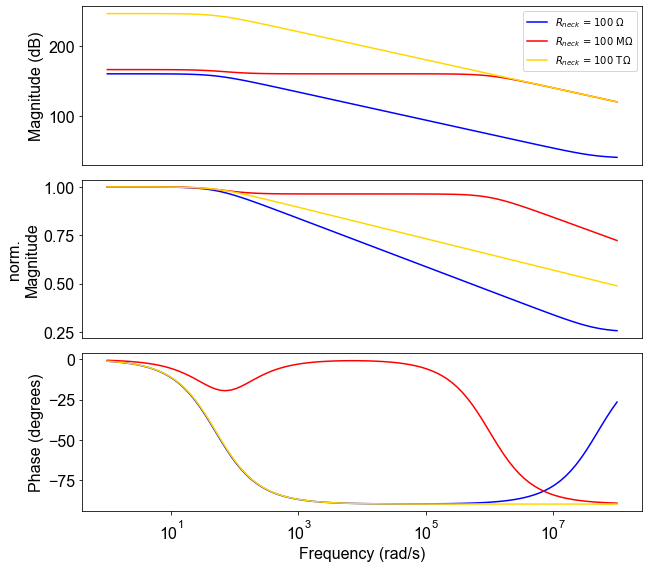

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define the impedance equation
# def Z(jw, Rneck):
#     return ((1 + .020j*w) * (Rneck + 1 + .020j*w)) / (2 + .040j*w + Rneck)

def Z(jw, Rneck):
    return (2e12 * Rneck * (0.02j*w + 1) + 2e20) / ((0.02j*w + 1) * (Rneck * (0.02j*w + 1) + 2000100000000))

# Frequency range
w = np.logspace(0, 8, 100)  # 1 to 10^8 rad/s

# Calculate the magnitude and phase for R_neck = 0 ohm
Z_0 = Z(w, 100)
mag_0 = np.abs(Z_0)
phase_0 = np.angle(Z_0, deg=True)

# Calculate the magnitude and phase for R_neck = 10 M ohm
Z_10M = Z(w, 10e6)
mag_10M = np.abs(Z_10M)
phase_10M = np.angle(Z_10M, deg=True)

# Calculate the magnitude and phase for R_neck = 100 M ohm
Z_100M = Z(w, 100e6)
mag_100M = np.abs(Z_100M)
phase_100M = np.angle(Z_100M, deg=True)

# Calculate the magnitude and phase for R_neck = 20 T ohm
Z_100T = Z(w, 100e12)
mag_100T = np.abs(Z_100T)
phase_100T = np.angle(Z_100T, deg=True)

# Plot the Bode plot
plt.figure(figsize=(9, 8))

plt.subplot(3, 1, 1)
plt.semilogx(w, 20*np.log10(mag_0), label='$R_{neck}$ = 100 $\Omega$' , color='b')
#plt.semilogx(w, 20*np.log10(mag_10M), label='R_neck = 10 M ohm', color='g')
plt.semilogx(w, 20*np.log10(mag_100M), label='$R_{neck}$ = 100 M$\Omega$', color='r')
plt.semilogx(w, 20*np.log10(mag_100T), label='$R_{neck}$ = 100 T$\Omega$', color='gold')
#plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)', fontsize=16, family='Arial')
#plt.title('Bode Plot') #  - Magnitude
plt.legend()
plt.xticks([], family='Arial'); plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=16); plt.tick_params(axis="y", labelsize=16)


plt.subplot(3, 1, 2)
plt.semilogx(w, 20*np.log10(mag_0)/np.max(20*np.log10(mag_0)), label='R_neck = 100 ohm' , color='b')
#plt.semilogx(w, 20*np.log10(mag_10M)/np.max(20*np.log10(mag_10M)), label='R_neck = 10 M ohm', color='g')
plt.semilogx(w, 20*np.log10(mag_100M)/np.max(20*np.log10(mag_100M)), label='R_neck = 100 M ohm', color='r')
plt.semilogx(w, 20*np.log10(mag_100T)/np.max(20*np.log10(mag_100T)), label='R_neck = 100 T ohm', color='gold')
#plt.xlabel('Frequency (rad/s)', fontsize=16, family='Arial')
plt.ylabel('norm.\nMagnitude', fontsize=16, family='Arial')
#plt.title('Bode Plot') #  - Magnitude
plt.xticks([], family='Arial'); plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=16); plt.tick_params(axis="y", labelsize=16)


plt.subplot(3, 1, 3)
plt.semilogx(w, phase_0, label='R_neck = 100 ohm' , color='b')
#plt.semilogx(w, phase_10M, label='R_neck = 10 M ohm' , color='g')
plt.semilogx(w, phase_100M, label='R_neck = 100 M ohm' , color='r')
plt.semilogx(w, phase_100T, label='R_neck = 100 T ohm' , color='gold')
plt.xlabel('Frequency (rad/s)', fontsize=16, family='Arial')
plt.ylabel('Phase (degrees)', fontsize=16, family='Arial')
plt.xticks(family='Arial'); plt.yticks(family='Arial')
plt.tick_params(axis="x", labelsize=16); plt.tick_params(axis="y", labelsize=16)


plt.tight_layout()
#plt.title('Bode Plot - Phase')
#plt.legend()
#plt.savefig('Bode2.pdf')

In [9]:
import matplotlib.patches as patches


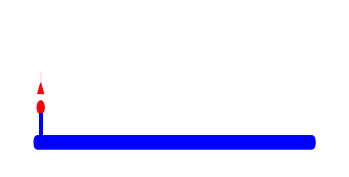

In [75]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlim(0, 11)
ax.set_ylim(0, 3)
ax.axis('off')

rectangle = patches.FancyBboxPatch((1, 0.5), 9, .01, linewidth=1, edgecolor='blue', facecolor='blue', boxstyle='round', mutation_scale=.4)
ax.add_patch(rectangle)

triangle = patches.Polygon([[1, 1+.4], [1.2, 1+.4], [1.1, 1.2+.4]], closed=True, color='red')
ax.add_patch(triangle)

spine_head = patches.Circle((1.1,1.15) , radius=.12, color='red')
ax.add_patch(spine_head)

ax.plot([1.1, 1.1], [0.5, 1], linewidth=4, color='blue')
ax.plot([1.1, 1.1], [1.6, 1.8], linewidth=.2, color='red')

#plt.savefig('setup2.pdf')

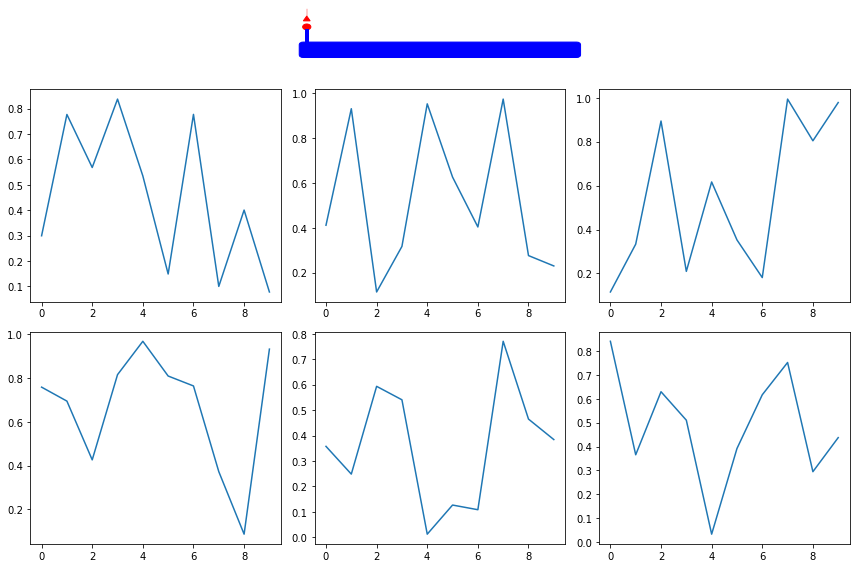

In [121]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3, 3, height_ratios=[1, 4, 4])
ax0 = fig.add_subplot(gs[0, :])
ax0.add_patch(patches.FancyBboxPatch((1, 0.0), 8, 0.4, linewidth=1, edgecolor='blue', facecolor='blue', boxstyle='round, pad=0.3', mutation_scale=.4))

triangle = patches.Polygon([[1, 1+.4], [1.2, 1+.4], [1.1, 1.2+.4]], closed=True, color='red')
ax0.add_patch(triangle)
spine_head = patches.Circle((1.1,1.15) , radius=.12, color='red')
ax0.add_patch(spine_head)
ax0.plot([1.1, 1.1], [0.5, 1], linewidth=4, color='blue')
ax0.plot([1.1, 1.1], [1.6, 1.9], linewidth=.4, color='red')
ax0.axis('off')
ax0.set_xlim(0-7, 10+7)
ax0.set_ylim(-.2, 2)


axes = [fig.add_subplot(gs[i, j]) for i in range(1, 3) for j in range(3)]
for ax in axes:
    ax.plot(np.random.rand(10))

plt.tight_layout()